In [1]:
import pandas as pd
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_formats = ['svg']

Fitting a linear regression model with Gradient Descent.


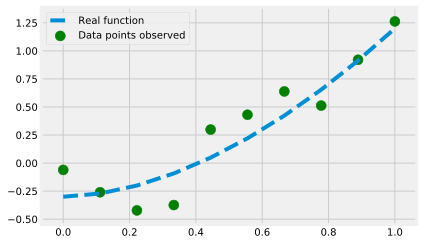

In [2]:
#@title We generate datapoints from a polynomial function.
n_points = 10
noise_magnitude = 0.2

x = np.linspace(0.0, 1.0, n_points)
x.sort()

y_real = 1.5 * x ** 1.8 - 0.3

# We add some artificial noise, as it is quite common to train on noisy data.
y = y_real + noise_magnitude * np.random.normal(size=n_points)

plt.plot(x, y_real, '--', label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points observed')
_ = plt.legend(loc='best')

we have generated datapoints from a polynomial function.

Defining our linear model, its cost function, and a way to display its predictions.

In [6]:
#@title Defining our linear model, its cost function, and a way to display its predictions.
def linear_regression(x, w, b):
    return x * w + b

def mean_squared_error(y, y_pred):
    return ((y - y_pred)**2).mean() / 2.0

def plot_linear_regression(x, y, y_pred):
    plt.ylim((-2.0, 2.0))
    error = y - y_pred
    mse = mean_squared_error(y, y_pred).round(2)
    plt.fill_between(x, y, y_pred, color='r', alpha=0.25, label=f'Error (MSE = {mse})')
    plt.bar(x, error, width=0.005, bottom=y_pred, color='red', alpha=0.25)
    plt.scatter(x, y, s=100, c='g', label='Data points')
    plt.plot(x, y_pred, '--', label='Linear regression')
    _ = plt.legend(loc='best')

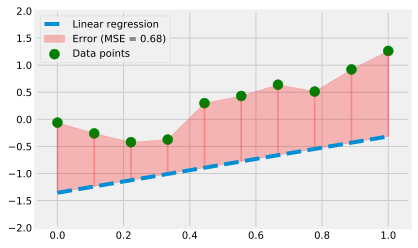

In [8]:
#@title Initializing weights randomly.

w_0 = np.random.normal()
b_0 = np.random.normal()

# Display the initial model.
y_pred = linear_regression(x, w_0, b_0)
plot_linear_regression(x, y, y_pred)

A Very bad model

MSE = 0.68   # very bad

In [10]:
def gradient_descent(x, y, w_0, b_0, learning_rate, iterations=10): # we be gin with w_0, b_0
    weights = [(w_0, b_0)] # initial weights
    errors = []
    for i in range(iterations):
        w, b = weights[-1]
        # We calculate the model's prediction / error with the latest weights.
        
        y_pred = linear_regression(x, w, b) # y_pred= x*w +b
        error = mean_squared_error(y, y_pred) # calculate the error
        
        # We update the weights based on the error at this step.
        w = w - learning_rate * np.dot(x, y_pred - y) / len(x)  ## (y_pred-y)*x
        b = b - learning_rate * (y_pred - y).mean()
        # We store the weights/error for later use.
        weights.append((w, b))
        errors.append(error)
    w, b = weights[-1]
    errors.append(mean_squared_error(y, linear_regression(x, w, b)))
    return weights, errors

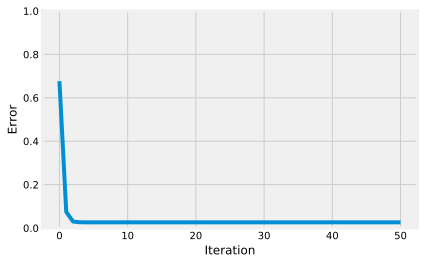

In [11]:
#@title Visualize the evolution of the error throughout the gradient descent process.
iterations = 50
weights, errors = gradient_descent(x, y, w_0, b_0, learning_rate=1.0, iterations=iterations)
plt.plot(range(iterations + 1), errors)
plt.xlabel("Iteration")
plt.ylabel("Error")
_ = plt.ylim((0, 1.0))

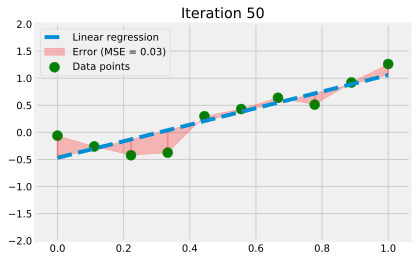

In [12]:
#@title Visualize the weights at different iterations.
from IPython.display import clear_output
import time

for n_iter, ((w, b), error) in enumerate(zip(weights, errors)):
  clear_output(wait=True)
  y_pred = linear_regression(x, w, b)
  plot_linear_regression(x, y, y_pred)
  plt.title(f"Iteration {n_iter}")
  plt.show()
  time.sleep(1.0 if n_iter < 10 else 0.0)

Linear Regression on real-world data.


In [3]:
!wget https://github.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/raw/master/train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
